# Classificazione Binaria: Mele di buona qualità e Mele di cattiva qualità

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.pipeline import Pipeline



## IMPORTARE DATI

In [262]:
os.chdir("C:/Users/Utente/PROGETTO_APPLE/")

In [263]:
path="data/apple_quality.csv"
df= pd.read_csv(path)

## PULIZIA DATI

In [264]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [266]:
df.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [267]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [268]:
df.isnull().sum().sum()

np.int64(8)

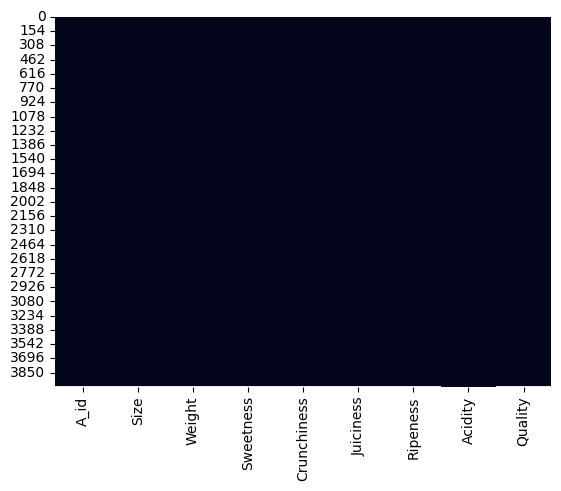

In [269]:
sns.heatmap(df.isnull(),cbar=False);

In [270]:
null_positions = np.where(df.isnull())
print(list(zip(null_positions[0], null_positions[1])))

[(np.int64(4000), np.int64(0)), (np.int64(4000), np.int64(1)), (np.int64(4000), np.int64(2)), (np.int64(4000), np.int64(3)), (np.int64(4000), np.int64(4)), (np.int64(4000), np.int64(5)), (np.int64(4000), np.int64(6)), (np.int64(4000), np.int64(8))]


In [271]:
df_clean=df.drop(4000,axis=0)
print(df_clean)

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

           Acidity Quality 

In [272]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [273]:
df_clean.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [274]:
df_clean.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [275]:
print(df_clean["Acidity"].unique())


['-0.491590483' '-0.722809367' '2.621636473' ... '-1.334611391'
 '-2.229719806' '1.599796456']


In [276]:
df_clean["Acidity"] = pd.to_numeric(df_clean["Acidity"], errors="coerce")


In [277]:
df_clean.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [278]:
df_clean = df_clean.drop(columns=['A_id'])


In [279]:
print(df_clean)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
0    -0.491590    good  
1    -0.722809    good  
2     2.621636     bad  
3     0.790723    good 

In [280]:
print(df_clean["Quality"].unique())

['good' 'bad']


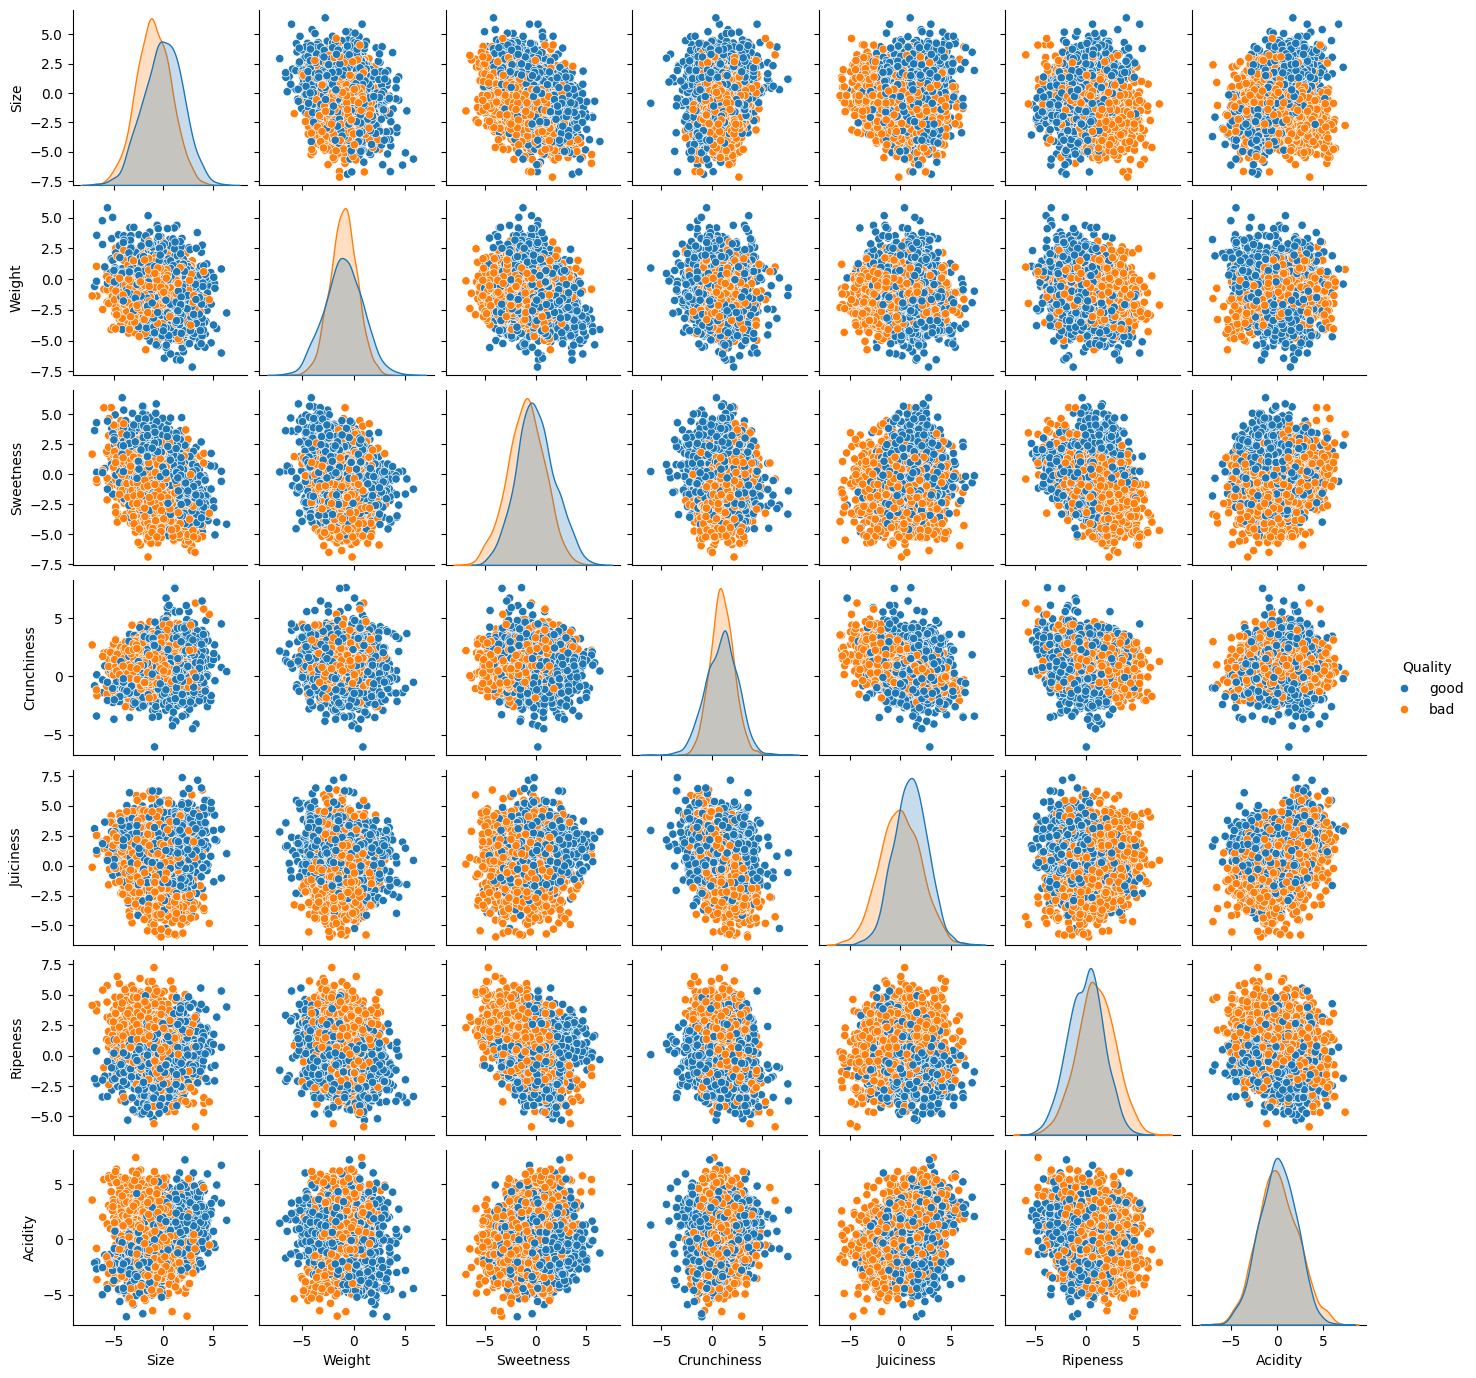

In [281]:
sns.pairplot(df_clean, hue='Quality',height=2);

## PREPROCESSING


In [282]:
le = LabelEncoder()
df_clean["Quality"] = le.fit_transform(df_clean["Quality"])

print(df_clean["Quality"].unique())
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

[1 0]
Mapping: {'bad': np.int64(0), 'good': np.int64(1)}


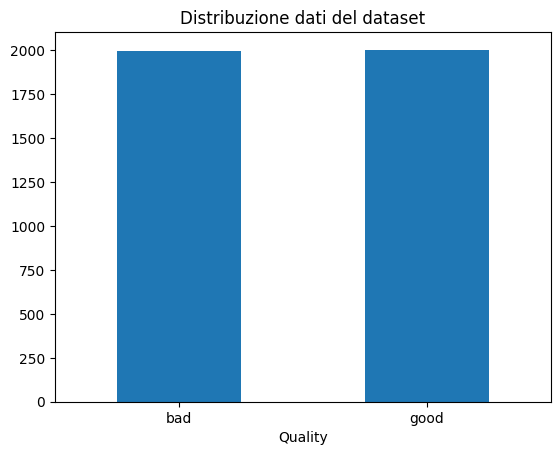

In [283]:
ax = df_clean["Quality"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribuzione dati del dataset")
ax.set_xticklabels(["bad", "good"], rotation=0)

plt.show()

In [284]:
print(df_clean["Quality"].value_counts(normalize=True))

Quality
1    0.501
0    0.499
Name: proportion, dtype: float64


In [285]:
print(df_clean["Quality"].value_counts())


Quality
1    2004
0    1996
Name: count, dtype: int64


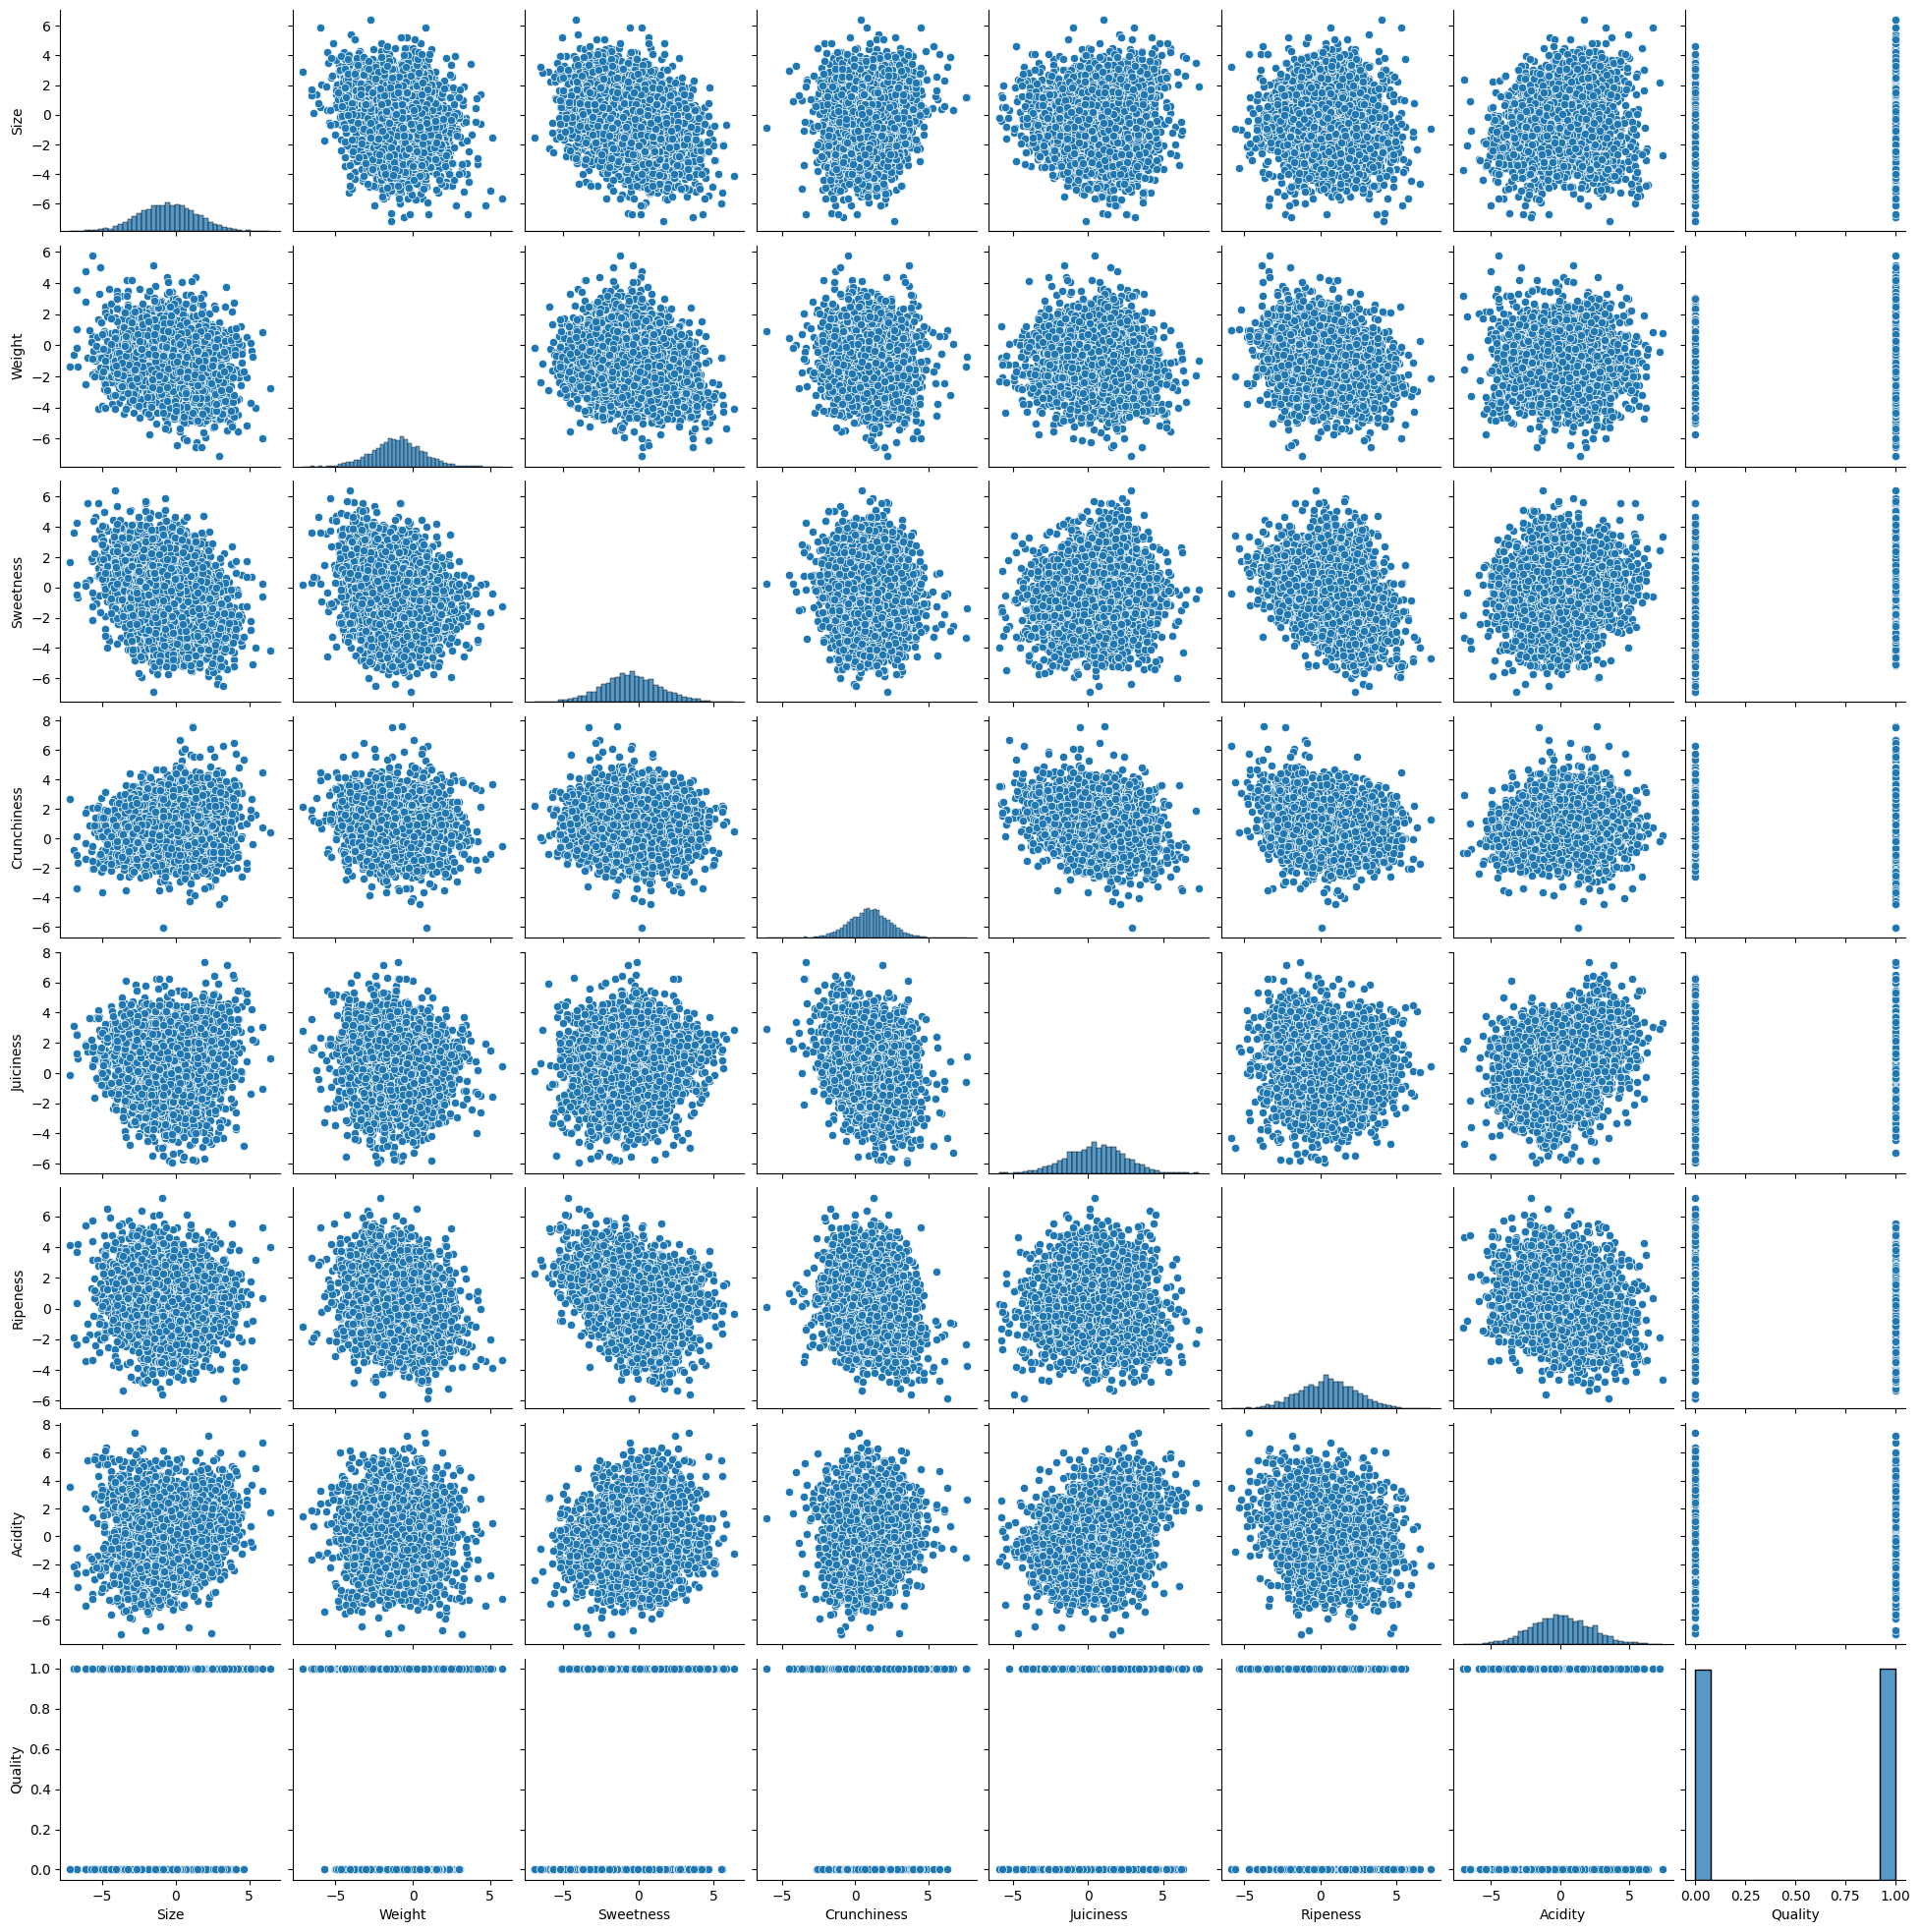

In [286]:
sns.pairplot(df_clean);

In [287]:
corrmat = df_clean.select_dtypes(include="number").corr()
corrmat


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


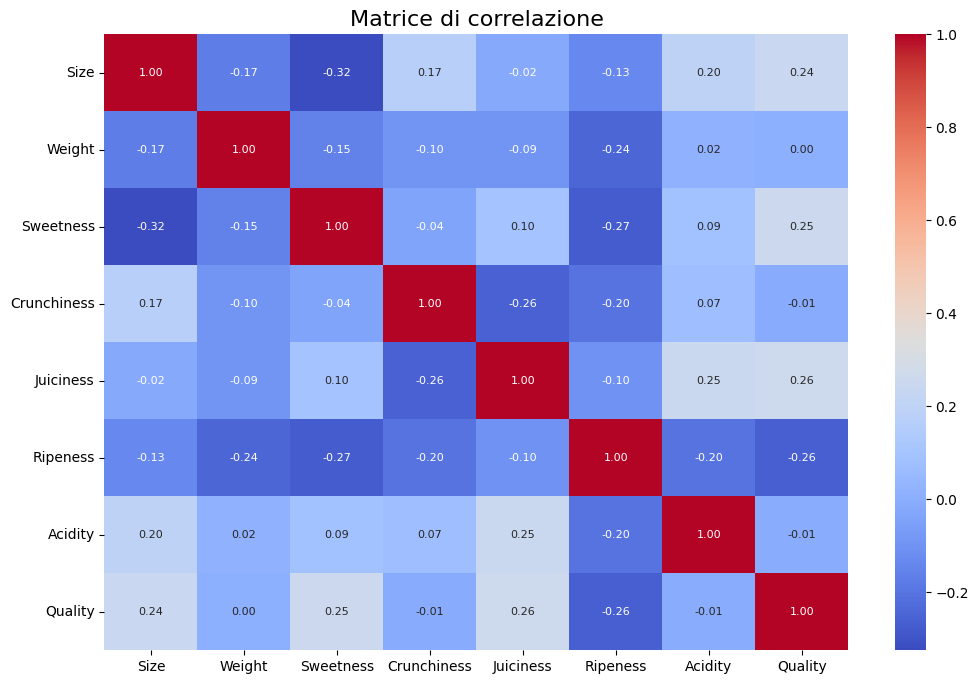

In [288]:
plt.figure(figsize=(12, 8))  
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size':8})
plt.title("Matrice di correlazione", fontsize=16)
plt.show()


In [289]:
corrmat = df_clean.corr()
target_corr = corrmat["Quality"].sort_values(ascending=False)
print(target_corr)


Quality        1.000000
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64


In [290]:
df_clean.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

## COSTRUZIONE DEL MODELLO

In [291]:
X_=df_clean[['Size',  'Sweetness', 'Juiciness','Ripeness']]
y=df_clean['Quality']

In [292]:
scaler = StandardScaler()
X = scaler.fit_transform(X_)

X = pd.DataFrame(X, columns=X_.columns)




In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    stratify=y)

In [294]:
classifiers = [DecisionTreeClassifier(max_depth=4),
               RandomForestClassifier(n_estimators=200,random_state=667),
               GradientBoostingClassifier(),
               GradientBoostingClassifier(n_estimators=50),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True,kernel='rbf')
               ]

for cls in classifiers:
    cls.fit(X_train, y_train)

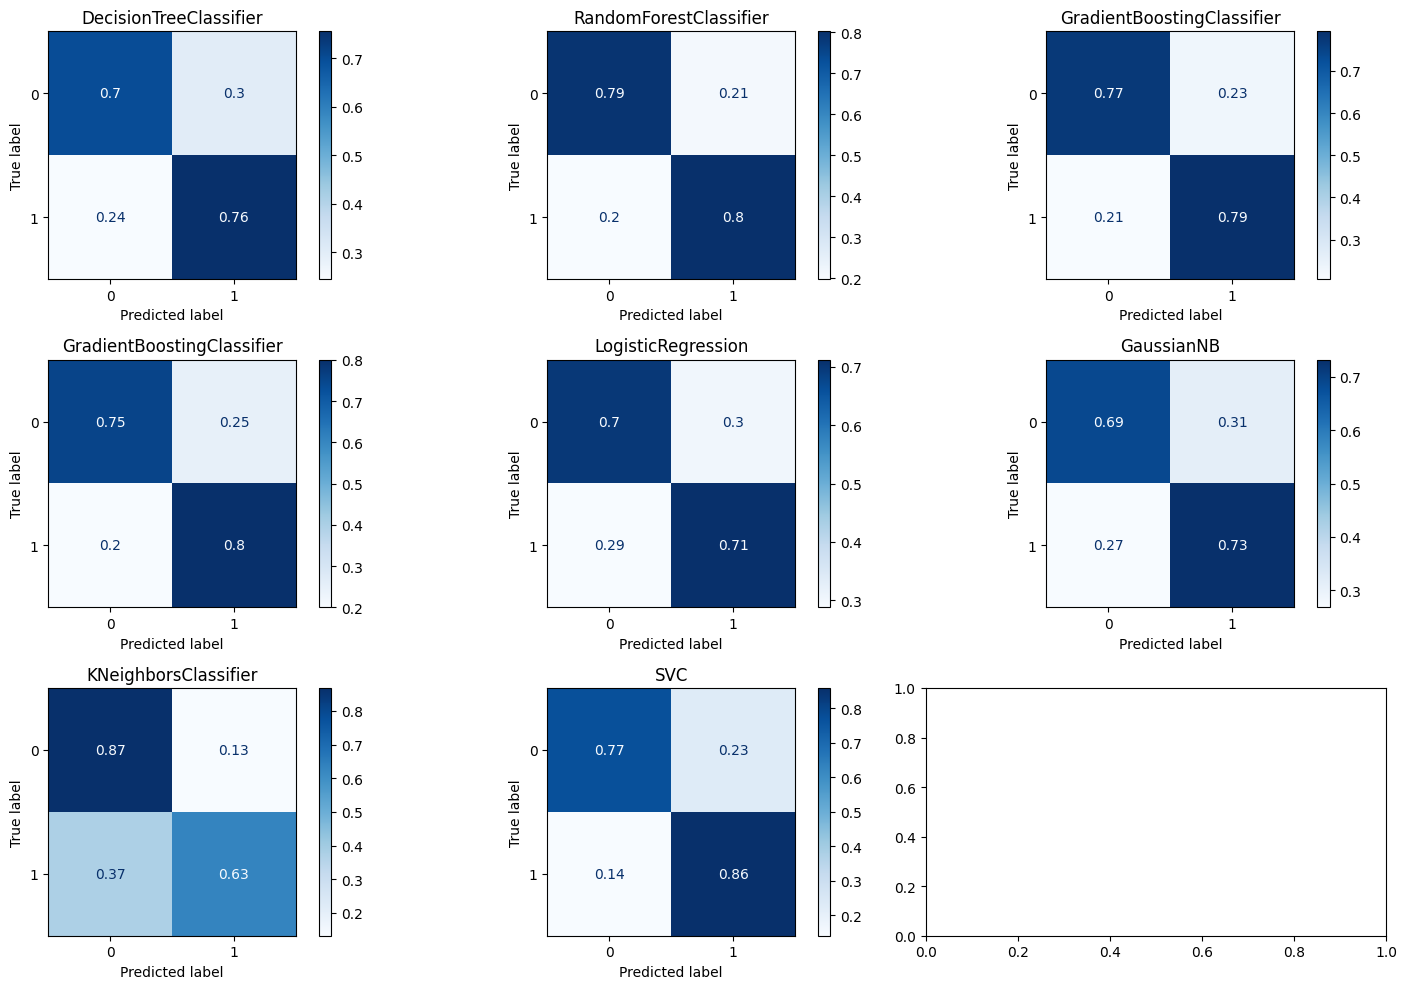

In [295]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues',
                                            normalize='true' 
                                            )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()

In [296]:
metrics = []

for cls in classifiers:
    y_pred = cls.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    metrics.append({
        'Classifier': type(cls).__name__,
        'Classe': 'good',
        'Predizioni corrette': cm_percent[0,0],
        'Predizioni errate': cm_percent[0,1]
    })
    metrics.append({
        'Classifier': type(cls).__name__,
        'Classe': 'bad',
        'Predizioni corrette': cm_percent[1,1],
        'Predizioni errate': cm_percent[1,0]
    })

df_metrics = pd.DataFrame(metrics)
print(df_metrics)


                    Classifier Classe  Predizioni corrette  Predizioni errate
0       DecisionTreeClassifier   good             0.697830           0.302170
1       DecisionTreeClassifier    bad             0.755408           0.244592
2       RandomForestClassifier   good             0.791319           0.208681
3       RandomForestClassifier    bad             0.801997           0.198003
4   GradientBoostingClassifier   good             0.772955           0.227045
5   GradientBoostingClassifier    bad             0.793677           0.206323
6   GradientBoostingClassifier   good             0.752922           0.247078
7   GradientBoostingClassifier    bad             0.800333           0.199667
8           LogisticRegression   good             0.697830           0.302170
9           LogisticRegression    bad             0.712146           0.287854
10                  GaussianNB   good             0.687813           0.312187
11                  GaussianNB    bad             0.732113      

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       599
           1       0.71      0.76      0.73       601

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200

RandomForestClassifier(n_estimators=200, random_state=667)
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       599
           1       0.79      0.80      0.80       601

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       599
           1       0.78      0.79      0.79       601

    accuracy                           0.78      1200
   m

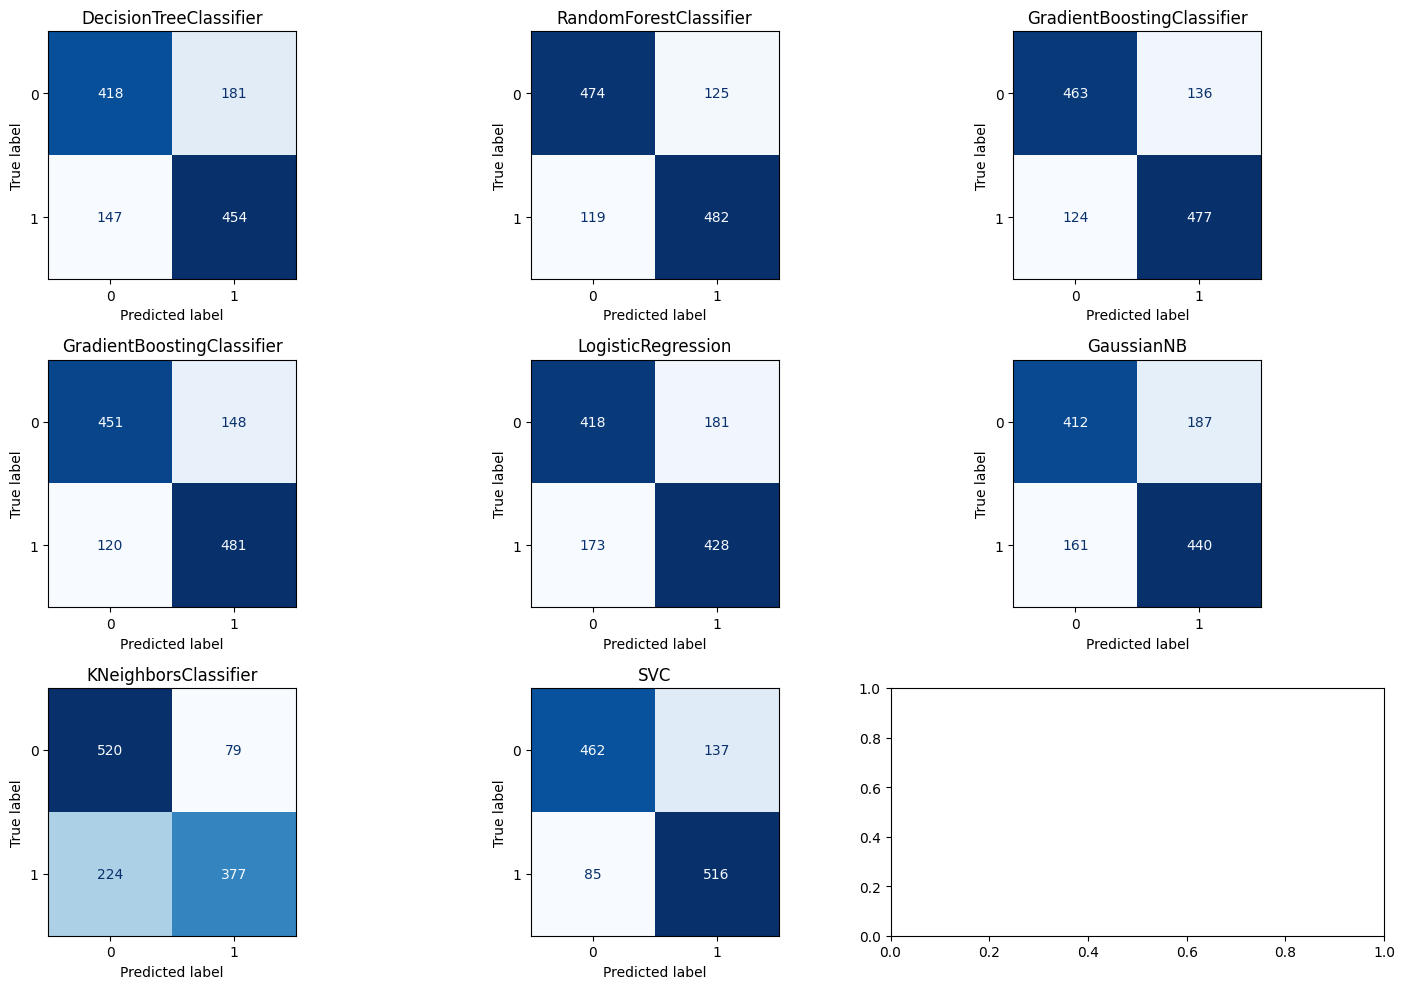

In [297]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for cls, ax in zip(classifiers, axes.flatten()):
    y_pred = cls.predict(X_test)
    print(cls)
    print(classification_report(y_test, y_pred))
    
    # Mostra la matrice di confusione nel subplot
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(str(cls).split('(')[0])

plt.tight_layout()
plt.show()


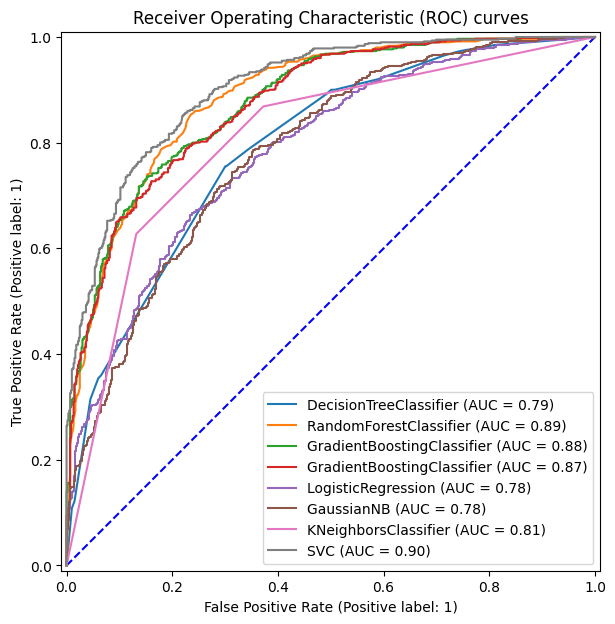

In [298]:
plt.figure(figsize=(8,7))
ax = plt.gca()
plt.plot([0,1],[0,1],'--b')

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_score =model.predict_proba(X_test)[:, 1]
    auc_model = roc_auc_score(y_test,y_score)

    RocCurveDisplay.from_estimator(model, X_test, y_test, label=f'{cls.__class__.__name__} (AUC = {auc_model:.2f})', ax=ax)
    plt.title("Receiver Operating Characteristic (ROC) curves")
    plt.legend(loc=4)

In [299]:
svc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(probability=True, random_state=42))
])

param_grid_svc = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", "auto"],
    "svc__kernel": ["linear", "rbf"]
}

grid_svc = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid_svc,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)


In [300]:
grid_svc.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'svc__C': [0.1, 1, ...], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [301]:
grid_svc.best_params_


{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [302]:
best_svc = grid_svc.best_estimator_


In [303]:
y_pred = best_svc.predict(X_test)


In [304]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8275

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       599
           1       0.81      0.86      0.83       601

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



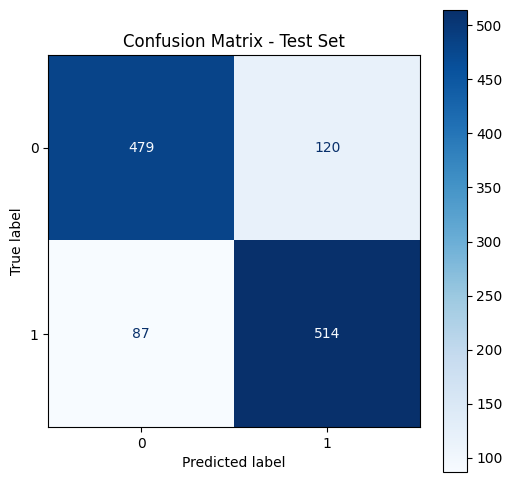

In [305]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(
    best_svc,
    X_test,
    y_test,
    ax=ax,
    cmap='Blues'
    # rimuovendo normalize → valori assoluti
)

ax.set_title("Confusion Matrix - Test Set")
plt.show()


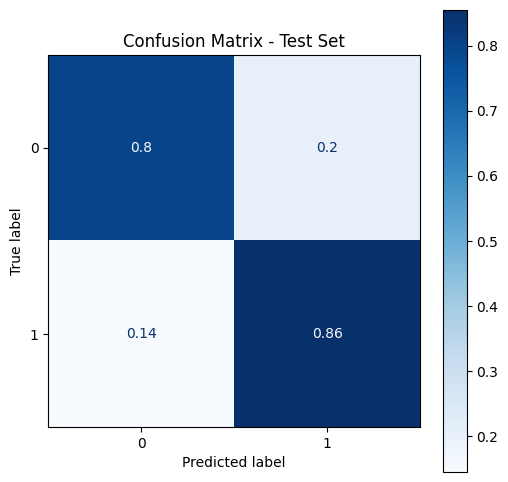

In [306]:
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(
    best_svc,
    X_test,
    y_test,
    ax=ax,
    cmap='Blues',
    normalize='true'  # percentuali per riga
)
ax.set_title("Confusion Matrix - Test Set")
plt.show()


In [307]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)


In [308]:
grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [309]:
grid_rf.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [310]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Estrae il modello Random Forest già addestrato con i migliori parametri
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)


# Valutazione
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8083333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       599
           1       0.80      0.82      0.81       601

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



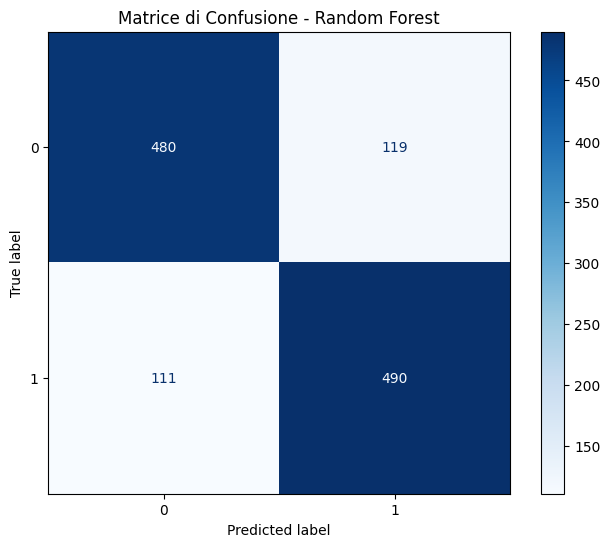

In [311]:
# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Matrice di Confusione - Random Forest")
plt.show()

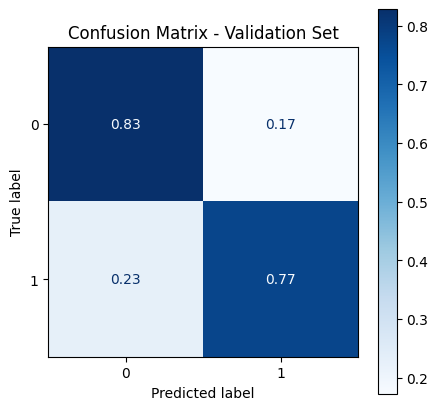

In [312]:
# Create a validation set from the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

# Train the best_rf model on the split training data
best_rf.fit(X_train_split, y_train_split)

# Create confusion matrix for validation set
fig, ax = plt.subplots(figsize=(5, 5))

ConfusionMatrixDisplay.from_estimator(
    best_rf,
    X_val,
    y_val,
    ax=ax,
    cmap='Blues',
    normalize='true'  # mostra percentuali invece dei conteggi
)

ax.set_title("Confusion Matrix - Validation Set")
plt.show()


In [313]:
import joblib

best_svc = grid_svc.best_estimator_
joblib.dump(best_svc, "models/svc_model.pkl")


['models/svc_model.pkl']

In [314]:
import joblib

best_rf = grid_rf.best_estimator_
joblib.dump(best_rf, "models/rf_model.pkl")


['models/rf_model.pkl']

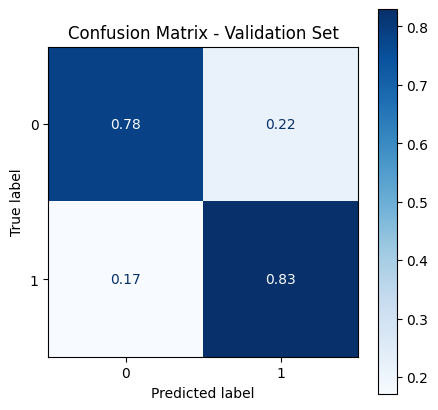

In [315]:
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(
    model,
    X_val,
    y_val,
    ax=ax,
    cmap='Blues',
    normalize='true'  # mostra percentuali invece dei conteggi
)
ax.set_title("Confusion Matrix - Validation Set")
plt.show()